In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
DATASET_ENCODING="ISO-8859-1"

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv(r"C:\Users\user\DS\DS\Vasanth\Dataset\FIFA 2018 Statistics.csv")

In [4]:
data

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


# Preprocessing

In [7]:
data.shape

(128, 27)

In [5]:
data=data.drop_duplicates()

In [6]:
data.drop('Date',axis=1,inplace=True)

# Dealing With Missing Values

In [7]:
data.isnull().sum()

Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [8]:
data.drop(['Own goals','Own goal Time'],axis=1,inplace=True)

In [9]:
data['1st Goal']=data['1st Goal'].fillna(data['1st Goal'].mean())

# Encoding

In [10]:
data.dtypes

Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
dtype: object

In [11]:
print(f"Team:{data['Team'].unique()}\n")
print(f"Opponent:{data['Opponent'].unique()}\n")
print(f"Man of the Match:{data['Man of the Match'].unique()}\n")
print(f"Round:{data['Round'].unique()}\n")
print(f"PSO:{data['PSO'].unique()}\n")

Team:['Russia' 'Saudi Arabia' 'Egypt' 'Uruguay' 'Morocco' 'Iran' 'Portugal'
 'Spain' 'France' 'Australia' 'Argentina' 'Iceland' 'Peru' 'Denmark'
 'Croatia' 'Nigeria' 'Costa Rica' 'Serbia' 'Germany' 'Mexico' 'Brazil'
 'Switzerland' 'Sweden' 'Korea Republic' 'Belgium' 'Panama' 'Tunisia'
 'England' 'Colombia' 'Japan' 'Poland' 'Senegal']

Opponent:['Saudi Arabia' 'Russia' 'Uruguay' 'Egypt' 'Iran' 'Morocco' 'Spain'
 'Portugal' 'Australia' 'France' 'Iceland' 'Argentina' 'Denmark' 'Peru'
 'Nigeria' 'Croatia' 'Serbia' 'Costa Rica' 'Mexico' 'Germany'
 'Switzerland' 'Brazil' 'Korea Republic' 'Sweden' 'Panama' 'Belgium'
 'England' 'Tunisia' 'Japan' 'Colombia' 'Senegal' 'Poland']

Man of the Match:['Yes' 'No']

Round:['Group Stage' 'Round of 16' 'Quarter Finals' 'Semi- Finals' '3rd Place'
 'Final']

PSO:['No' 'Yes']



In [12]:
label_encoder = LabelEncoder()
data['Man of the Match'] = label_encoder.fit_transform(data['Man of the Match'])
man_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

data['PSO'] = label_encoder.fit_transform(data['PSO'])
PSO_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}

In [14]:
round_values = list(data['Round'].unique())
round_values

['Group Stage',
 'Round of 16',
 'Quarter Finals',
 'Semi- Finals',
 '3rd Place',
 'Final']

In [15]:
round_mapping = {label: index for index, label in enumerate(round_values)}
round_mapping

{'Group Stage': 0,
 'Round of 16': 1,
 'Quarter Finals': 2,
 'Semi- Finals': 3,
 '3rd Place': 4,
 'Final': 5}

In [16]:
data['Round'] = data['Round'].apply(lambda X: round_mapping[X])

In [17]:
data

,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,...,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO
0,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,...,118,22,0,0,0,1,12.000000,0,0,0
1,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,...,105,10,0,0,0,0,39.457447,0,0,0
2,Egypt,Uruguay,0,43,8,3,3,2,0,1,...,112,12,2,0,0,0,39.457447,0,0,0
3,Uruguay,Egypt,1,57,14,4,6,4,5,1,...,111,6,0,0,0,1,89.000000,0,0,0
4,Morocco,Iran,0,64,13,3,6,4,5,0,...,101,22,1,0,0,0,39.457447,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,England,Croatia,1,46,11,1,6,4,4,3,...,148,14,1,0,0,0,5.000000,3,0,0
124,Belgium,England,2,43,12,4,3,5,4,1,...,108,11,1,0,0,1,4.000000,4,0,0
125,England,Belgium,0,57,15,5,7,3,5,0,...,110,5,2,0,0,0,39.457447,4,0,0
126,France,Croatia,4,39,8,6,1,1,2,1,...,99,14,2,0,0,1,18.000000,5,0,0


In [18]:
data['Team'].unique()

array(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Morocco', 'Iran',
       'Portugal', 'Spain', 'France', 'Australia', 'Argentina', 'Iceland',
       'Peru', 'Denmark', 'Croatia', 'Nigeria', 'Costa Rica', 'Serbia',
       'Germany', 'Mexico', 'Brazil', 'Switzerland', 'Sweden',
       'Korea Republic', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Colombia', 'Japan', 'Poland', 'Senegal'], dtype=object)

In [19]:
pd.get_dummies(data['Team'])

,Argentina,Australia,Belgium,Brazil,Colombia,Costa Rica,Croatia,Denmark,Egypt,England,...,Portugal,Russia,Saudi Arabia,Senegal,Serbia,Spain,Sweden,Switzerland,Tunisia,Uruguay
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
124,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
 pd.get_dummies(data['Opponent'])

,Argentina,Australia,Belgium,Brazil,Colombia,Costa Rica,Croatia,Denmark,Egypt,England,...,Portugal,Russia,Saudi Arabia,Senegal,Serbia,Spain,Sweden,Switzerland,Tunisia,Uruguay
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
125,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data['Opponent'] = data['Opponent'].apply(lambda X: 'opp_' + X)

In [22]:
data_concat = pd.concat([data,pd.get_dummies(data['Team']),pd.get_dummies(data['Opponent'])],axis=1)

In [23]:
data_concat.drop(['Team','Opponent'],axis=1,inplace=True)

In [24]:
data_concat

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,opp_Portugal,opp_Russia,opp_Saudi Arabia,opp_Senegal,opp_Serbia,opp_Spain,opp_Sweden,opp_Switzerland,opp_Tunisia,opp_Uruguay
0,5,40,13,7,3,3,6,3,11,0,...,0,0,1,0,0,0,0,0,0,0
1,0,60,6,0,3,3,2,1,25,2,...,0,1,0,0,0,0,0,0,0,0
2,0,43,8,3,3,2,0,1,7,3,...,0,0,0,0,0,0,0,0,0,1
3,1,57,14,4,6,4,5,1,13,3,...,0,0,0,0,0,0,0,0,0,0
4,0,64,13,3,6,4,5,0,14,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,...,0,0,0,0,0,0,0,0,0,0
124,2,43,12,4,3,5,4,1,5,5,...,0,0,0,0,0,0,0,0,0,0
125,0,57,15,5,7,3,5,0,12,2,...,0,0,0,0,0,0,0,0,0,0
126,4,39,8,6,1,1,2,1,14,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
np.sum(data_concat.dtypes == 'object')

0

In [26]:
Y = data_concat['Man of the Match']
X = data_concat.drop('Man of the Match',axis=1)

# Spllitting the Data

In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, train_size=0.7)

# Scaling

In [28]:
scaler = RobustScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [29]:
X

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,...,opp_Portugal,opp_Russia,opp_Saudi Arabia,opp_Senegal,opp_Serbia,opp_Spain,opp_Sweden,opp_Switzerland,opp_Tunisia,opp_Uruguay
0,2.0,-0.6250,0.166667,1.166667,-0.666667,0.000000,0.333333,1.0,-0.571429,-0.666667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.5,0.6250,-1.000000,-1.166667,-0.666667,0.000000,-1.000000,0.0,1.428571,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.5,-0.4375,-0.666667,-0.166667,-0.666667,-0.444444,-1.666667,0.0,-1.142857,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.4375,0.333333,0.166667,0.333333,0.444444,0.000000,0.0,-0.285714,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.5,0.8750,0.166667,-0.166667,0.333333,0.444444,0.000000,-0.5,-0.142857,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.0,-0.2500,-0.166667,-0.833333,0.333333,0.444444,-0.333333,1.0,1.285714,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,0.5,-0.4375,0.000000,0.166667,-0.666667,0.888889,-0.333333,0.0,-1.428571,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,-0.5,0.4375,0.500000,0.500000,0.666667,0.000000,0.000000,-0.5,-0.428571,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,1.5,-0.6875,-0.666667,0.833333,-1.333333,-0.888889,-1.000000,0.0,-0.142857,-0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

# Decision Tree 

In [34]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=2)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [35]:
y_pred=dt.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [42]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred) 
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.7692


In [44]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[10  8]
 [ 1 20]]


In [43]:
acc = roc_auc_score(Y_test, y_pred)
print("Test set auc: {:.4f}".format(acc))

Test set auc: 0.7540


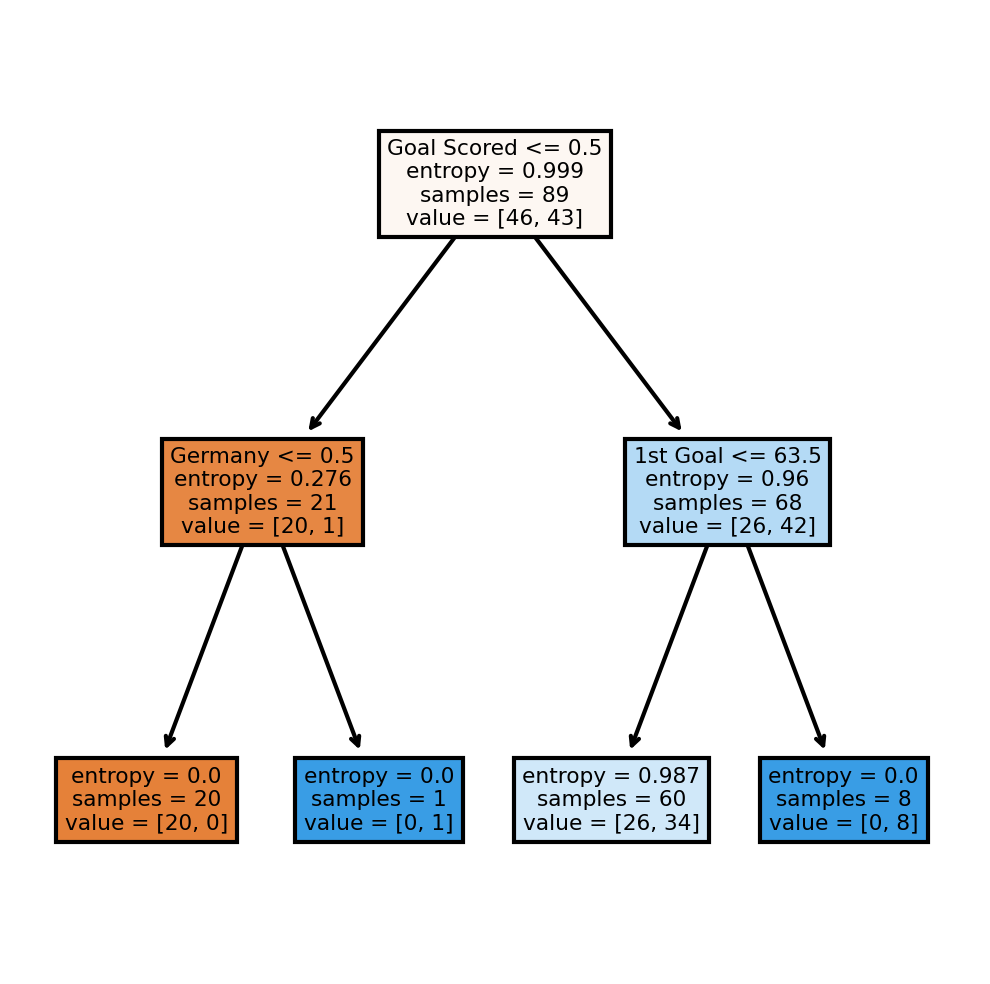

In [47]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = X_test.columns,
               filled = True);
fig.savefig('imagename.png')

# Random Forest

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [55]:
y_pred=rf.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [56]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred) 
print(f"Test accuracy: {accuracy:.4f}")

Test accuracy: 0.6667


In [58]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[13  5]
 [ 8 13]]


In [57]:
acc = roc_auc_score(Y_test, y_pred)
print("Test set auc: {:.4f}".format(acc))

Test set auc: 0.6706
